In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objs as go
from sklearn.feature_selection import RFE

In [2]:
train_data=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Home-Loan-Prediction\\Dataset\\train.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [6]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
categorical_features=[]
numerical_features=[]

In [9]:
my_columns=train_data.columns.tolist()

In [10]:
my_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [11]:
for i in my_columns:
    if train_data[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [12]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [13]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Check Missing Values

In [14]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Figure size 720x360 with 0 Axes>

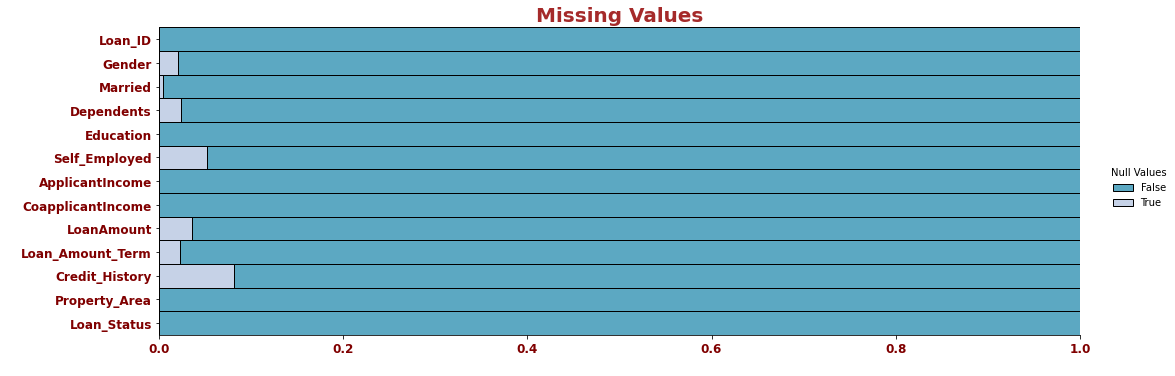

In [15]:
plt.figure(figsize=(10, 5))
sns.displot(
data = train_data.isna().melt(value_name="Null Values"),
y = "variable",
hue = "Null Values",
multiple="fill",
aspect=3,
palette='PuBuGn_r' 
)
plt.title('Missing Values', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');


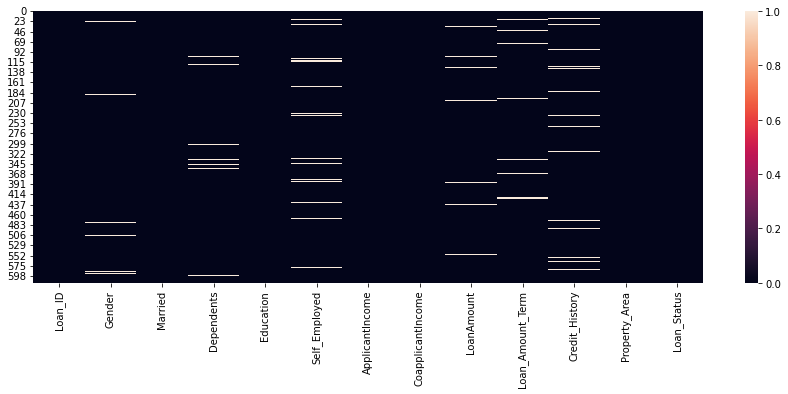

In [16]:
plt.figure(figsize=(15, 5))
sns.heatmap(train_data.isnull())
plt.show()

In [17]:
train_data[train_data.isnull().any(axis=1)].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


In [18]:
my_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [19]:
un_cols=["Gender","Married","Education","Self_Employed","Credit_History","Loan_Status","Property_Area","Dependents"]

In [20]:
for col in un_cols:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(train_data[col].value_counts())
    print("Percentage")
    print("-------------------")
    print(np.round(train_data[col].value_counts(normalize=True)*100))

-------------------
Column Name Is Gender
-------------------
Male      489
Female    112
Name: Gender, dtype: int64
Percentage
-------------------
Male      81.0
Female    19.0
Name: Gender, dtype: float64
-------------------
Column Name Is Married
-------------------
Yes    398
No     213
Name: Married, dtype: int64
Percentage
-------------------
Yes    65.0
No     35.0
Name: Married, dtype: float64
-------------------
Column Name Is Education
-------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Percentage
-------------------
Graduate        78.0
Not Graduate    22.0
Name: Education, dtype: float64
-------------------
Column Name Is Self_Employed
-------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
Percentage
-------------------
No     86.0
Yes    14.0
Name: Self_Employed, dtype: float64
-------------------
Column Name Is Credit_History
-------------------
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Percentage
-

In [21]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
train_data['Dependents'] = train_data['Dependents'].map({'0':'Zero','1':'One', '2':'Two', '3+':'Three+'})

In [24]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Zero,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Zero,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Zero,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Zero,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Filling Missing Values

In [25]:
train_data.Gender = train_data.Gender.fillna("Male")

In [26]:
train_data.Married = train_data.Married .fillna("No")

In [27]:
train_data.Dependents = train_data.Dependents.fillna('Zero')

In [28]:
train_data.Self_Employed = train_data.Self_Employed.fillna('No')

In [29]:
train_data.Loan_Amount_Term = train_data.Loan_Amount_Term.fillna(342.0)

In [30]:
train_data.LoanAmount = train_data.LoanAmount.fillna(146.0)

In [31]:
train_data.Credit_History = train_data.Credit_History.fillna(1.0)

In [32]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualization

In [33]:
un_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Loan_Status',
 'Property_Area',
 'Dependents']

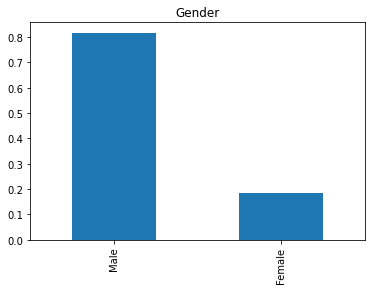

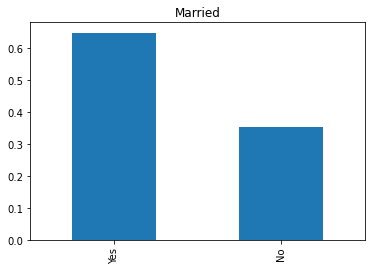

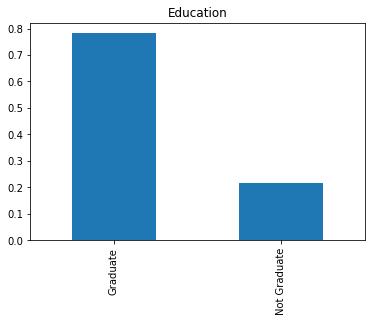

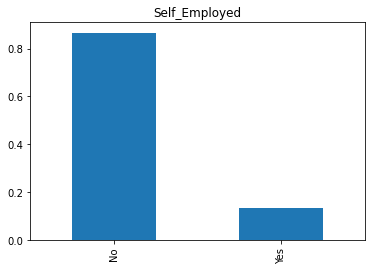

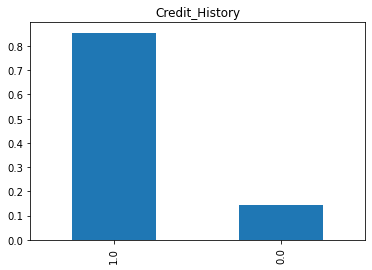

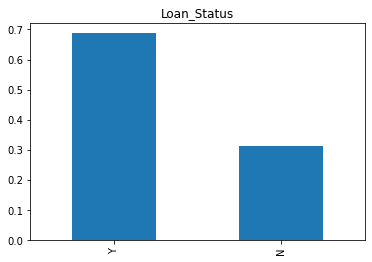

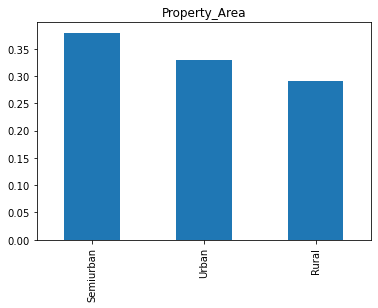

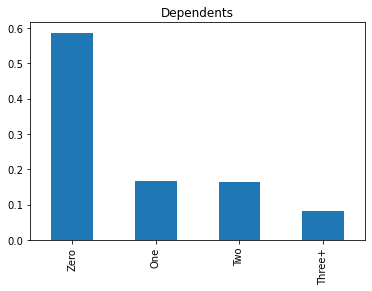

In [34]:
for col in un_cols:
    train_data[col].value_counts(normalize=True).plot.bar(title = col)
    plt.show()

# Seperate Target and Feature Columns

In [35]:
Target=train_data["Loan_Status"]

In [36]:
Features=train_data.drop(["Loan_Status"],axis=1)

In [37]:
Target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [38]:
Features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,Zero,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,Zero,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,Zero,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,Zero,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [39]:
Features.shape

(614, 12)

# Drop Less Importants Columns

In [40]:
Features.drop(["Loan_ID"],axis=1,inplace=True)

In [41]:
Features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,Zero,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban
1,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,Zero,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,Zero,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,Zero,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


# Label Encoding

In [42]:
Features_categorical_features=[]
Features_numerical_features=[]

In [43]:
for i in Features.columns.tolist():
    if train_data[i].dtype=="object":
        Features_categorical_features.append(i)
    else:
        Features_numerical_features.append(i)

In [44]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [45]:
Features_categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [46]:
for i in Features_categorical_features:
    le=LabelEncoder()
    Features[i]=le.fit_transform(Features[i])

<AxesSubplot:>

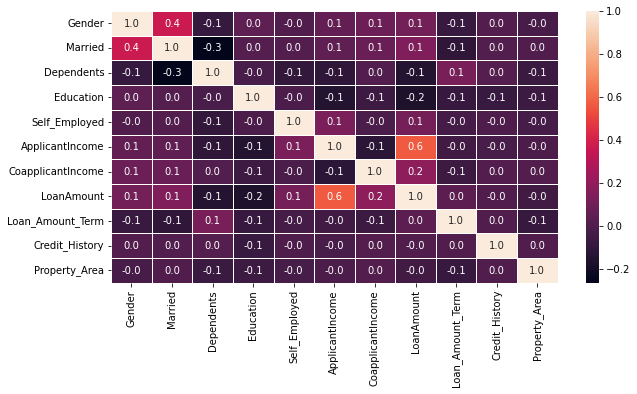

In [47]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(Features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Selection

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit_features = test.fit(Features,Target)
score_col=pd.DataFrame(fit_features.scores_,columns=["Score_Value"])

In [49]:
score_col

,Score_Value
0,0.198059
1,4.378260
2,0.560398
3,4.547685
4,0.008380
5,0.013574
6,2.151457
7,0.809494
8,0.269339
9,252.652090


In [50]:
Name_col=pd.DataFrame(Features.columns)

In [51]:
top_features=pd.concat([Name_col,score_col],axis=1)
top_features

,0,Score_Value
0,Gender,0.198059
1,Married,4.378260
2,Dependents,0.560398
3,Education,4.547685
4,Self_Employed,0.008380
5,ApplicantIncome,0.013574
6,CoapplicantIncome,2.151457
7,LoanAmount,0.809494
8,Loan_Amount_Term,0.269339
9,Credit_History,252.652090


In [52]:
top_features.columns=["Name","Score Value"]
top_features

,Name,Score Value
0,Gender,0.198059
1,Married,4.378260
2,Dependents,0.560398
3,Education,4.547685
4,Self_Employed,0.008380
5,ApplicantIncome,0.013574
6,CoapplicantIncome,2.151457
7,LoanAmount,0.809494
8,Loan_Amount_Term,0.269339
9,Credit_History,252.652090


In [53]:
top8=top_features.nlargest(8,"Score Value")
top8

,Name,Score Value
9,Credit_History,252.652090
3,Education,4.547685
1,Married,4.378260
6,CoapplicantIncome,2.151457
7,LoanAmount,0.809494
10,Property_Area,0.631733
2,Dependents,0.560398
8,Loan_Amount_Term,0.269339


In [54]:
# Features=Features.drop(["Loan_Amount_Term","Dependents"],axis=1)

# Algorithm Implementation

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(Features,Target,test_size=0.1,random_state=2)

In [56]:
accuracy=[]
f1=[]
model=[]
precision=[]
support=[]

In [57]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

# Support Vector Machine

In [58]:
svc=SVC()
svc.fit(xtrain,ytrain)
trainpredict = svc.predict(xtrain)
testpredict = svc.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))

f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))

model.append('Support Vector Machine')
cm = confusion_matrix(ytest, testpredict)
print("Confusion matrix")
print(cm)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           N       1.00      0.02      0.03       178
           Y       0.68      1.00      0.81       374

    accuracy                           0.68       552
   macro avg       0.84      0.51      0.42       552
weighted avg       0.78      0.68      0.56       552

Classification Report for Test Data
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        14
           Y       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62

--------------------------------------------------------------------------
Accuracy on Train Data is: 0.68
Accuracy on Test Data is: 0.77
------------------------------------------------------------

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0

In [59]:
f1,precision,accuracy,model

([0.68], [0.78], [0.77], ['Support Vector Machine'])

# Gaussian Naive Bayes

In [60]:
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)

trainpredict = GNB.predict(xtrain)
testpredict = GNB.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))
model.append('Gaussian Naive Bayes)')

cm = confusion_matrix(ytest, testpredict)
print("Confusion matrix")
print(cm)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           N       0.81      0.49      0.61       178
           Y       0.80      0.94      0.86       374

    accuracy                           0.80       552
   macro avg       0.80      0.72      0.74       552
weighted avg       0.80      0.80      0.78       552

Classification Report for Test Data
              precision    recall  f1-score   support

           N       0.67      0.43      0.52        14
           Y       0.85      0.94      0.89        48

    accuracy                           0.82        62
   macro avg       0.76      0.68      0.71        62
weighted avg       0.81      0.82      0.81        62

--------------------------------------------------------------------------
Accuracy on Train Data is: 0.8
Accuracy on Test Data is: 0.82
-------------------------------------------------------------

In [61]:
f1,precision,accuracy,model

([0.68, 0.81],
 [0.78, 0.8],
 [0.77, 0.82],
 ['Support Vector Machine', 'Gaussian Naive Bayes)'])

# Decision Tree Classifier

In [62]:
dst=tree.DecisionTreeClassifier(criterion='entropy')
dst.fit(xtrain,ytrain)

trainpredict = dst.predict(xtrain)
testpredict = dst.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))

model.append('Decision Tree Classifier')
cm = confusion_matrix(ytest, testpredict)
print("Confusion matrix")
print(cm)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       178
           Y       1.00      1.00      1.00       374

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

Classification Report for Test Data
              precision    recall  f1-score   support

           N       0.32      0.50      0.39        14
           Y       0.82      0.69      0.75        48

    accuracy                           0.65        62
   macro avg       0.57      0.59      0.57        62
weighted avg       0.71      0.65      0.67        62

--------------------------------------------------------------------------
Accuracy on Train Data is: 1.0
Accuracy on Test Data is: 0.65
-------------------------------------------------------------

In [63]:
f1,precision,accuracy,model

([0.68, 0.81, 0.67],
 [0.78, 0.8, 1.0],
 [0.77, 0.82, 0.65],
 ['Support Vector Machine',
  'Gaussian Naive Bayes)',
  'Decision Tree Classifier'])

# Random Forest Classifier

In [64]:
RF_CL = RandomForestClassifier()
RF_CL.fit(xtrain, ytrain)

trainpredict = RF_CL.predict(xtrain)
testpredict = RF_CL.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))
model.append('Random Forest')
cm = confusion_matrix(ytest, testpredict)
print("Confusion matrix")
print(cm)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       178
           Y       1.00      1.00      1.00       374

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

Classification Report for Test Data
              precision    recall  f1-score   support

           N       0.45      0.36      0.40        14
           Y       0.82      0.88      0.85        48

    accuracy                           0.76        62
   macro avg       0.64      0.62      0.62        62
weighted avg       0.74      0.76      0.75        62

--------------------------------------------------------------------------
Accuracy on Train Data is: 1.0
Accuracy on Test Data is: 0.76
-------------------------------------------------------------

In [65]:
f1,precision,accuracy,model

([0.68, 0.81, 0.67, 0.75],
 [0.78, 0.8, 1.0, 1.0],
 [0.77, 0.82, 0.65, 0.76],
 ['Support Vector Machine',
  'Gaussian Naive Bayes)',
  'Decision Tree Classifier',
  'Random Forest'])

# K-Neighbors Classifier

In [66]:
KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(xtrain, ytrain)

trainpredict = KNN.predict(xtrain)
testpredict = KNN.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))

f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))

model.append('K-Neighbors Classifier')
cm = confusion_matrix(ytest, testpredict)
print("Confusion matrix")
print(cm)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           N       0.67      0.21      0.32       178
           Y       0.72      0.95      0.82       374

    accuracy                           0.71       552
   macro avg       0.69      0.58      0.57       552
weighted avg       0.70      0.71      0.66       552

Classification Report for Test Data
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        14
           Y       0.74      0.83      0.78        48

    accuracy                           0.65        62
   macro avg       0.37      0.42      0.39        62
weighted avg       0.57      0.65      0.61        62

--------------------------------------------------------------------------
Accuracy on Train Data is: 0.71
Accuracy on Test Data is: 0.65
------------------------------------------------------------

In [67]:
f1,precision,accuracy,model

([0.68, 0.81, 0.67, 0.75, 0.61],
 [0.78, 0.8, 1.0, 1.0, 0.7],
 [0.77, 0.82, 0.65, 0.76, 0.65],
 ['Support Vector Machine',
  'Gaussian Naive Bayes)',
  'Decision Tree Classifier',
  'Random Forest',
  'K-Neighbors Classifier'])

# Logistic Regression

In [68]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(xtrain,ytrain)

trainpredict = lr.predict(xtrain)
testpredict = lr.predict(xtest)

evaluation_parametrics(ytrain,trainpredict,ytest,testpredict)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))

f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))

precision.append(np.round(precision_score(ytrain,trainpredict,average = "weighted"),2))

model.append('Logistic Regression')
cm = confusion_matrix(ytest, testpredict)
print("Confusion matrix")
print(cm)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           N       0.93      0.44      0.60       178
           Y       0.79      0.98      0.88       374

    accuracy                           0.81       552
   macro avg       0.86      0.71      0.74       552
weighted avg       0.83      0.81      0.79       552

Classification Report for Test Data
              precision    recall  f1-score   support

           N       0.71      0.36      0.48        14
           Y       0.84      0.96      0.89        48

    accuracy                           0.82        62
   macro avg       0.78      0.66      0.68        62
weighted avg       0.81      0.82      0.80        62

--------------------------------------------------------------------------
Accuracy on Train Data is: 0.81
Accuracy on Test Data is: 0.82
------------------------------------------------------------

In [69]:
f1,precision,accuracy,model

([0.68, 0.81, 0.67, 0.75, 0.61, 0.8],
 [0.78, 0.8, 1.0, 1.0, 0.7, 0.83],
 [0.77, 0.82, 0.65, 0.76, 0.65, 0.82],
 ['Support Vector Machine',
  'Gaussian Naive Bayes)',
  'Decision Tree Classifier',
  'Random Forest',
  'K-Neighbors Classifier',
  'Logistic Regression'])

In [70]:
print(len(f1), len(accuracy), len(model)),print(len(precision))

6 6 6
6


(None, None)

In [71]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'Precision':precision,
                    'F1 score':f1})

In [72]:
output

,Model,Accuracy,Precision,F1 score
0,Support Vector Machine,0.77,0.78,0.68
1,Gaussian Naive Bayes),0.82,0.80,0.81
2,Decision Tree Classifier,0.65,1.00,0.67
3,Random Forest,0.76,1.00,0.75
4,K-Neighbors Classifier,0.65,0.70,0.61
5,Logistic Regression,0.82,0.83,0.80
